In [87]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

shot_data = pd.read_csv("NBA_Shots_2018_19.csv")

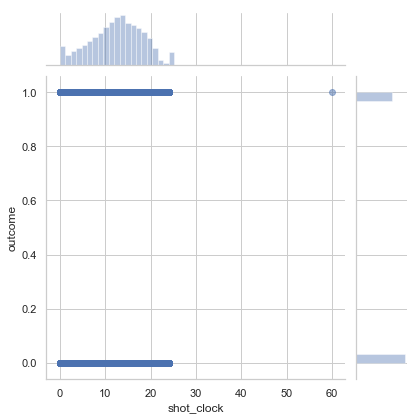

In [34]:
#time vs. success
sns.jointplot(shot_data['shot_clock'], shot_data['outcome'], kind='scatter', alpha=0.5)


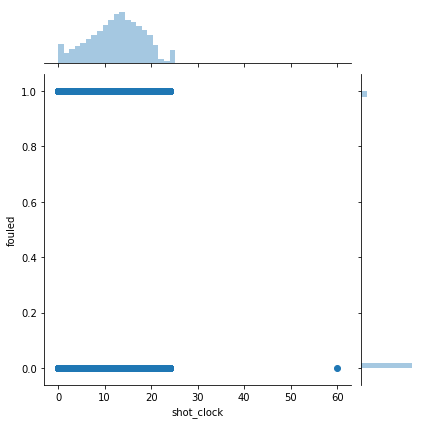

In [30]:
#time vs. foul
sns.jointplot(shot_data['shot_clock'], shot_data['fouled'], kind='scatter')


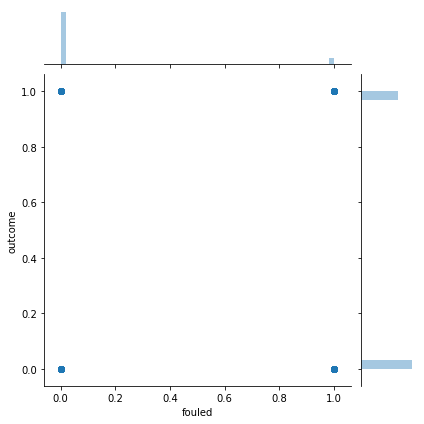

In [31]:
#fouled vs. success
sns.jointplot(shot_data['fouled'], shot_data['outcome'], kind='scatter')


In [88]:
shot_data['location'] = ''

shot_data.loc[((shot_data['location_y'] >= -24) & (shot_data['location_y'] < -5) & (shot_data['location_x'] < -27) & (shot_data['distance'] < 50)) | ((shot_data['location_y'] <= 24) & (shot_data['location_y'] > 10) & (shot_data['location_x'] > 27) & (shot_data['distance'] < 50)), 'location'] = 'Right'

shot_data.loc[((shot_data['location_y'] <= 24) & (shot_data['location_y'] > 10) & (shot_data['location_x'] < -27) & (shot_data['distance'] < 50)) | ((shot_data['location_y'] >= -24) & (shot_data['location_y'] < -5) & (shot_data['location_x'] > 27) & (shot_data['distance'] < 50)), 'location'] = 'Left'

shot_data.loc[((shot_data['location_y'] >= -5) & (shot_data['location_y'] <= 10) & (shot_data['location_x'] < -27) & (shot_data['distance'] < 50)) | ((shot_data['location_y'] >= -5) & (shot_data['location_y'] <= 10) & (shot_data['location_x'] > 27) & (shot_data['distance'] < 50)), 'location'] = 'Center'

shot_data.loc[shot_data['three'] == 1, 'location'] = 'Three'




shot_data['situation'] = ''

shot_data.loc[((shot_data['shot_clock'] >= 0) & (shot_data['shot_clock'] < 8)), 'situation'] = 'Desperate Shot'

shot_data.loc[((shot_data['shot_clock'] >= 8) & (shot_data['shot_clock'] < 16)), 'situation'] = 'Standard Shot'

shot_data.loc[((shot_data['shot_clock'] >= 16) & (shot_data['shot_clock'] < 24)), 'situation'] = 'Rushed Shot'







new_frame = shot_data.loc[:,['shot_type', 'shot_clock', 'outcome', 'three', 'fouled', 'distance', 'location', 'situation']]

In [89]:
new_frame

,shot_type,shot_clock,outcome,three,fouled,distance,location,situation
0,post,8.84,0,0,0,9.319040,Right,Standard Shot
1,layup,17.32,1,0,0,4.379690,Center,Rushed Shot
2,jumper,18.76,0,1,0,24.420200,Three,Rushed Shot
3,jumper,18.80,0,0,0,14.237800,Center,Rushed Shot
4,jumper,8.60,0,0,0,17.957500,,Standard Shot
5,jumper,19.44,1,1,0,22.855500,Three,Rushed Shot
6,jumper,17.40,0,1,0,26.250300,Three,Rushed Shot
7,post,5.80,0,0,0,6.487410,Center,Desperate Shot
8,post,12.72,1,0,0,6.272520,Right,Standard Shot
9,jumper,16.48,0,1,0,25.172600,Three,Rushed Shot


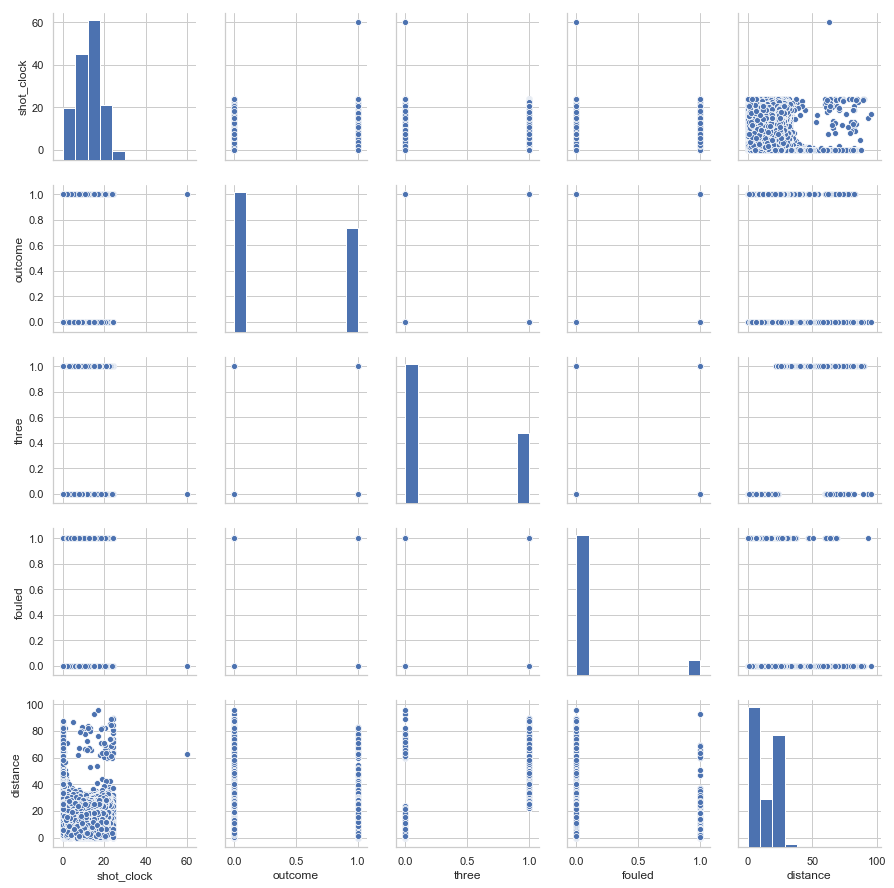

In [48]:
sns.pairplot(new_frame)



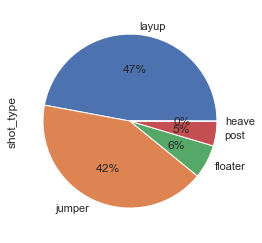

In [74]:
#on a MADE shot, the shot-type was most likely...
only_success = new_frame.groupby('outcome').apply(lambda g: g[g['outcome'] == 1])
only_success['shot_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')

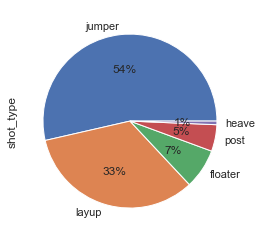

In [75]:
#on a MISSED shot, the shot-type was most likely... 
only_failure = new_frame.groupby('outcome').apply(lambda g: g[g['outcome'] == 0])
only_failure['shot_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')

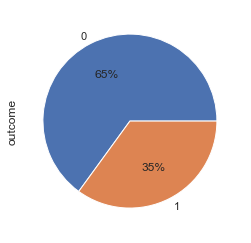

In [65]:
#if it was a three-point attempt, the outcome was... 
three = new_frame.groupby('three').apply(lambda g: g[g['three'] == 1])
three['outcome'].value_counts().plot(kind='pie', autopct='%1.0f%%')

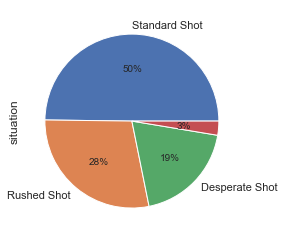

In [120]:
#on a MADE shot, the situation was most likely... 
only_success = new_frame.groupby('outcome').apply(lambda g: g[g['outcome'] == 1])
only_success['situation'].value_counts().plot(kind='pie', autopct='%1.0f%%')
                                                           

In [117]:
only_success = new_frame.groupby('outcome').apply(lambda g: (g[g['outcome'] == 1], g[g['shot_clock'] <= 3], g[g['distance'] > 25]))
#only_success['shot_type'].value_counts().plot(kind='pie')



In [121]:
only_success.head()

shot_type  shot_clock  outcome  three  fouled  distance location  \
outcome                                                                       
1       1      layup       17.32        1      0       0   4.37969   Center   
        5     jumper       19.44        1      1       0  22.85550    Three   
        8       post       12.72        1      0       0   6.27252    Right   
        10    jumper        7.36        1      1       0  24.63690    Three   
        13    jumper        2.72        1      0       0  19.32340            

                 situation  
outcome                     
1       1      Rushed Shot  
        5      Rushed Shot  
        8    Standard Shot  
        10  Desperate Shot  
        13  Desperate Shot

In [123]:
only_success = new_frame.groupby('outcome').apply(lambda g: g[g['outcome'] == 1])
only_success.head()

shot_type  shot_clock  outcome  three  fouled  distance location  \
outcome                                                                       
1       1      layup       17.32        1      0       0   4.37969   Center   
        5     jumper       19.44        1      1       0  22.85550    Three   
        8       post       12.72        1      0       0   6.27252    Right   
        10    jumper        7.36        1      1       0  24.63690    Three   
        13    jumper        2.72        1      0       0  19.32340            

                 situation  
outcome                     
1       1      Rushed Shot  
        5      Rushed Shot  
        8    Standard Shot  
        10  Desperate Shot  
        13  Desperate Shot

In [124]:
short_success = only_success.groupby('shot_clock').apply(lambda g: g[g['shot_clock'] < 3])
short_success.head()

shot_type  shot_clock  outcome  three  fouled  \
shot_clock outcome                                                     
0.0        1       438     layup         0.0        1      0       0   
                   582     layup         0.0        1      0       0   
                   603     layup         0.0        1      0       0   
                   689    jumper         0.0        1      1       0   
                   941     layup         0.0        1      0       0   

                        distance location       situation  
shot_clock outcome                                         
0.0        1       438   3.93742   Center  Desperate Shot  
                   582   4.15226   Center  Desperate Shot  
                   603   1.88064   Center  Desperate Shot  
                   689  25.90360    Three  Desperate Shot  
                   941   5.24462   Center  Desperate Shot

In [125]:
far_short_success = short_success.groupby('distance').apply(lambda g: g[g['distance'] > 25])
far_short_success.head()

,,,,shot_type,shot_clock,outcome,three,fouled,distance,location,situation
distance,shot_clock,outcome,,,,,,,,,
25.0004,0.00,1,184676,jumper,0.00,1,1,0,25.0004,Three,Desperate Shot
25.0009,2.96,1,202545,jumper,2.96,1,1,0,25.0009,Three,Desperate Shot
25.0038,1.20,1,180595,jumper,1.20,1,1,0,25.0038,Three,Desperate Shot
25.0075,2.72,1,56652,jumper,2.72,1,1,0,25.0075,Three,Desperate Shot
25.0096,0.68,1,23433,jumper,0.68,1,1,0,25.0096,Three,Desperate Shot


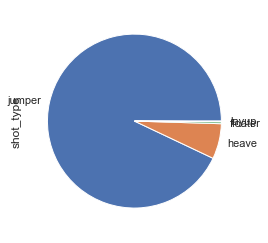

In [126]:
far_short_success['shot_type'].value_counts().plot(kind='pie')
